**Імпорт бібліотек**

In [84]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy import stats

**Дані з таблиці**

In [150]:
x = np.array([1.20, 1.57, 1.94, 2.31, 2.68, 3.05, 3.42, 3.79])
y = np.array([2.56, 2.06, 1.58, 1.25, 0.91, 0.66, 0.38, 0.21])

Реалізація лінійної регресії

In [257]:
x_reshaped = x.reshape(-1,1)
linear_regression = LinearRegression().fit(x_reshaped, y)
y_predicted_linear = linear_regression.predict(x_reshaped)

Реалізація квадратної регресії

In [252]:
quadratic_regression = np.poly1d(np.polyfit(x,y,2))

Реалізація гіперболічної регресії

In [253]:
x_hyperbolic = 1/x_reshaped
hyperbolic_regression = LinearRegression().fit(x_hyperbolic, y)
y_predicted_hyperbolic = lambda x: hyperbolic_regression.coef_[0] / x + hyperbolic_regression.intercept_

Реалізація степеневої регресії

In [254]:
log_x = np.log(x)
log_y = np.log(y)
b_power, log_a_power = np.polyfit(log_x, log_y, 1)
a_power = np.exp(log_a_power)
y_predicted_power = lambda x: a_power * x ** b_power

Реалізація показникової регресії

In [255]:
b_exponential, log_a_exponential = np.polyfit(x,log_y,1)
a_exponential = np.exp(log_a_exponential)
y_predicted_exponential = lambda x: a_exponential * np.exp(b_exponential * x)

Реалізація логарифмічної регресії

In [256]:
logarithmic_regression = LinearRegression().fit(log_x.reshape(-1,1), y)
y_predicted_logarithmic = lambda x: logarithmic_regression.coef_[0] * x + logarithmic_regression.intercept_

**2. Обчислення коефіціенту кореляції Пірсона**

In [265]:
pearson_correlation_coefficient, pvalue = stats.pearsonr(x,y)
print(f'Коефіціент кореляції Пірсона: {pearson_correlation_coefficient:.4f}')

Коефіціент кореляції Пірсона: -0.9879


**3. Рівняння регресій**

In [211]:
print(f"Рівняння лінійної регресії: y = {linear_regression.coef_[0]:.4f}x + {linear_regression.intercept_:.3f}")
print(f"\nРівняння квадратної регресії: y = {quadratic_regression[2]:.4f}x^2 - {-quadratic_regression[1]:.4f}x + {quadratic_regression[0]:.4f}")
print(f"\nРівняння гіперболічної регресії: y = {hyperbolic_regression.coef_[0]:.4f}/x + ({hyperbolic_regression.intercept_:.4f})")
print(f"\nРівняння степеневої регресії: у = {a_power:.4f}x^({b_power:.4f})")
print(f"\nРівняння показникової регресії: у = {a_exponential:.4f}e^({b_exponential:.4f}x)")
print(f"\nРівняння логарифмічної регресії: y = {logarithmic_regression.coef_[0]:.3f}Ln(x) + {logarithmic_regression.intercept_:.3f}")

Рівняння лінійної регресії: y = -0.8993x + 3.445

Рівняння квадратної регресії: y = 0.1874x^2 - 1.8344x + 4.4769

Рівняння гіперболічної регресії: y = 4.1636/x + (-0.7119)

Рівняння степеневої регресії: у = 5.1563x^(-2.0329)

Рівняння показникової регресії: у = 9.3234e^(-0.9296x)

Рівняння логарифмічної регресії: y = -2.075Ln(x) + 2.964


**4. Відхилення R^2**

In [223]:
print(f'R^2 для лінійної регресії: {r2_score(y, y_predicted_linear):.5f}')
print(f'R^2 для квадратної регресії: {r2_score(y, quadratic_regression(x)):.5f}')
print(f'R^2 для гіперболічної регресії: {r2_score(y, y_predicted_hyperbolic(x)):.5f}')
print(f'R^2 для степеневої регресії: {r2_score(y, y_predicted_power(x)):.5f}')
print(f'R^2 для показникової регресії: {r2_score(y, y_predicted_exponential(x)):.5f}')
print(f'R^2 для логарифмічної регресії: {r2_score(y, y_predicted_logarithmic(log_x)):.5f}')

R^2 для лінійної регресії: 0.97601
R^2 для квадратної регресії: 0.99922
R^2 для гіперболічної регресії: 0.96813
R^2 для степеневої регресії: 0.74102
R^2 для показникової регресії: 0.93263
R^2 для логарифмічної регресії: 0.99924


**5. Побудова графіків**

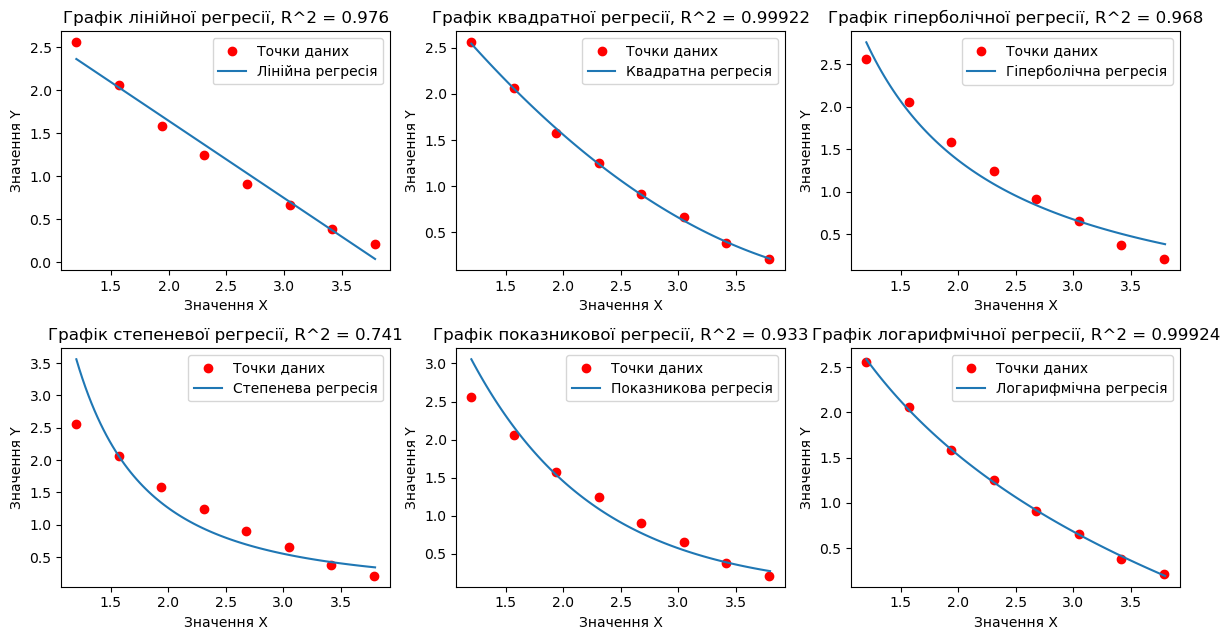

In [266]:
fig, axis = plt.subplots(nrows=2, ncols=3, figsize=(12,6.5))

for axes in axis:
    for ax in axes:
        ax.set_xlabel('Значення X')
        ax.set_ylabel('Значення Y')
        ax.scatter(x, y, color='red', label='Точки даних')
        ax.legend()

# Графік лінійної регресії
axis[0, 0].plot(x, y_predicted_linear, label='Лінійна регресія')
axis[0, 0].set_title(f'Графік лінійної регресії, R^2 = {r2_score(y, y_predicted_linear):.3f}')
axis[0, 0].legend()

# Графік квадратної регресії
line = np.linspace(1.2,3.8,100)
axis[0,1].plot(line, quadratic_regression(line), label='Квадратна регресія')
axis[0,1].set_title(f'Графік квадратної регресії, R^2 = {r2_score(y, quadratic_regression(x)):.5f}')
axis[0,1].legend()

# Графік гіперболічної регресії
axis[0,2].plot(line, y_predicted_hyperbolic(line), label='Гіперболічна регресія')
axis[0,2].set_title(f'Графік гіперболічної регресії, R^2 = {r2_score(y, y_predicted_hyperbolic(x)):.3f}')
axis[0,2].legend()

# Графік степеневої регресії
axis[1,0].plot(line, y_predicted_power(line), label='Степенева регресія')
axis[1,0].set_title(f'Графік степеневої регресії, R^2 = {r2_score(y, y_predicted_power(x)):.3f}')
axis[1,0].legend()

# Графік показникової регресії
axis[1, 1].plot(line, y_predicted_exponential(line), label='Показникова регресія')
axis[1, 1].set_title(f'Графік показникової регресії, R^2 = {r2_score(y, y_predicted_exponential(x)):.3f}')
axis[1, 1].legend()

# Графік логарифмічної регресії
axis[1, 2].plot(line, y_predicted_logarithmic(np.log(line)), label='Логарифмічна регресія')
axis[1, 2].set_title(f'Графік логарифмічної регресії, R^2 = {r2_score(y, y_predicted_logarithmic(log_x)):.5f}')
axis[1, 2].legend()

plt.tight_layout()